# 1.0 Imports

In [13]:
import pandas  as pd
import numpy   as np
import seaborn as sns

from matplotlib        import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn           import metrics

# 2.0 KNN (K-Nearest Neighbors) - Raw

## 2.1 Data Load

In [14]:
# Load dataset
df = pd.read_csv('../datasets/train.csv')
df.head()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional
0,1767,21,278.172008,2577.05,24196.89636,104.306544,31.038763,6,5,7,21,14,9,15,Não,Não,Negar
1,11920,40,268.874152,2465.39,19227.37796,69.858778,36.917093,5,8,5,40,23,10,18,Não,Não,Negar
2,8910,36,446.643127,1055.29,42822.28223,134.201478,34.561714,0,3,6,26,13,3,15,Sim,Não,Negar
3,4964,58,321.141267,703.05,51786.82600,297.350067,31.493561,0,3,7,12,7,2,1,Sim,Não,Negar
4,10100,35,428.716114,891.29,44626.85346,134.201478,28.028887,2,8,7,24,10,8,20,Sim,Não,Negar


In [15]:
# Data Shape
print(f'The dataframe have {df.shape[0]}  rows and {df.shape[1]} columns')

The dataframe have 9500  rows and 17 columns


## 2.2 Implement Model

In [16]:
# Check data balance
df['limite_adicional'].value_counts(normalize=True)

Negar       0.841579
Conceder    0.158421
Name: limite_adicional, dtype: float64

In [17]:
# Isolate the predictor variables
features = ['idade', 'saldo_atual', 'divida_atual', 'renda_anual', 'valor_em_investimentos',
'taxa_utilizacao_credito', 'num_emprestimos', 'num_contas_bancarias', 'num_cartoes_credito',
'dias_atraso_dt_venc', 'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']

# Isolate the response variable
label = 'limite_adicional'

# Preparating train data
x_train = df.loc[:, features]
y_train = df.loc[:, label].values.ravel() # Values/ravel turns into an array

In [18]:
# Create knn object with a number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Training the algorithm
knn_classifier.fit(x_train, y_train)

# Predictions
y_pred = knn_classifier.predict(x_train)

# Comparing predict vs realized
df1 = df.loc[:, ['id_cliente', 'limite_adicional']]
df1['predicted'] = y_pred
df1['right'] = df1.apply(lambda x: 1 if x['limite_adicional'] == x['predicted'] else 0, axis=1)

df1

,id_cliente,limite_adicional,predicted,right
0,1767,Negar,Negar,1
1,11920,Negar,Negar,1
2,8910,Negar,Negar,1
3,4964,Negar,Negar,1
4,10100,Negar,Negar,1
...,...,...,...,...
9495,5155,Negar,Negar,1
9496,11977,Negar,Negar,1
9497,9278,Negar,Negar,1
9498,2525,Negar,Negar,1


## 2.3 Metrics

**<span class="mark">Remembering that we have a class (Conceder) with a representativity of 84%, which indicates unbalanced data.</span>**

### 2.3.1 Confusion Matrix

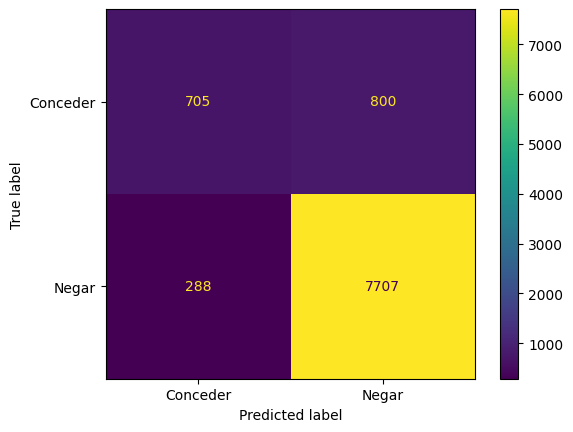

In [19]:
# Confusion matrix
matrix =  metrics.confusion_matrix(y_train, y_pred)
matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=['Conceder', 'Negar'])
matrix_display.plot()
plt.show()

### 2.3.2 Accuracy

In [20]:
# Accuracy with metrics library
acc = metrics.accuracy_score(y_train, y_pred)

print('The algorithm got a {:.2f}% accuracy'.format(acc * 100))

The algorithm got a 88.55% accuracy


### 2.3.3 Precision

In [21]:
# Precision (of all predictions made on the positive class, how many times did I got right?)
prec = metrics.precision_score(y_train, y_pred, pos_label='Conceder')
print('The algorithm got a {:.2f}% precision score'.format(prec * 100))

The algorithm got a 71.00% precision score


### 2.3.4 Recall

In [22]:
recall = metrics.recall_score(y_train, y_pred, pos_label='Conceder')
print('The algorithm got a {:.2f}% recall score'.format(recall * 100))

The algorithm got a 46.84% recall score


The algorithm have a good accuracy due to the Negar Class, so if our objective is to aim to deny customers, it seems good, but it can get better. Now, if our objective is to provide a good experience by conceiving, we are way far from good.

# 3. Exercises

### 3.1 Retraining the algorithm to k = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [23]:
# Checking our dataframe
df.head()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional
0,1767,21,278.172008,2577.05,24196.89636,104.306544,31.038763,6,5,7,21,14,9,15,Não,Não,Negar
1,11920,40,268.874152,2465.39,19227.37796,69.858778,36.917093,5,8,5,40,23,10,18,Não,Não,Negar
2,8910,36,446.643127,1055.29,42822.28223,134.201478,34.561714,0,3,6,26,13,3,15,Sim,Não,Negar
3,4964,58,321.141267,703.05,51786.82600,297.350067,31.493561,0,3,7,12,7,2,1,Sim,Não,Negar
4,10100,35,428.716114,891.29,44626.85346,134.201478,28.028887,2,8,7,24,10,8,20,Sim,Não,Negar


In [24]:
# Create an empty dataframe that will receive the k and the metrics for each k value
df2 = pd.DataFrame()

# Separaring predictor and predicted variables
features = df.select_dtypes(exclude="object").columns.to_list()
labels = "limite_adicional"

# Creating datasets
x_train = df.loc[:, features]
y_train = df.loc[:, label].values

In [25]:
# For k = 3

# Create KNN object
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the momdel
knn_classifier.fit(x_train, y_train)

# Make prediction
y_pred = knn_classifier.predict(x_train)

# Metrics
acc3 = metrics.accuracy_score(y_train, y_pred)
prec3 = metrics.precision_score(y_train, y_pred, pos_label='Conceder')
rec3 = metrics.recall_score(y_train, y_pred, pos_label='Conceder')

# Create a list that receives the metrics
data = [3, acc3, prec3, rec3]

# Create dataframe ffrom metrics
df2 = pd.DataFrame(data).T

# Renames dataframe axis
df2.rename(columns={0: 'k', 1: 'accuracy', 2: 'precision', 3: 'recall'}, inplace=True)
df2

,k,accuracy,precision,recall
0,3.0,0.886211,0.720833,0.459801


In [26]:
# For k = 5

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_train)

# Metrics
acc5 = metrics.accuracy_score(y_train, y_pred)
prec5 = metrics.precision_score(y_train, y_pred, pos_label='Conceder')
rec5 = metrics.recall_score(y_train, y_pred, pos_label='Conceder')

data = [5, acc5, prec5, rec5]

# Create dataframe from metrics
aux = pd.DataFrame(data).T

# Renames dataframe axis
aux.rename(columns={0: 'k', 1: 'accuracy', 2: 'precision', 3: 'recall'}, inplace=True)

# Create an object that receives both dataframes
frames = [df2, aux]

# Concat and save to other variable
df2 = pd.concat(frames)
df2

,k,accuracy,precision,recall
0,3.0,0.886211,0.720833,0.459801
0,5.0,0.863789,0.664075,0.283721


In [27]:
# For k=7

knn_classifier = KNeighborsClassifier(n_neighbors=7)

knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_train)

# Metrics
acc7 = metrics.accuracy_score(y_train, y_pred)
prec7 = metrics.precision_score(y_train, y_pred, pos_label='Conceder')
rec7 = metrics.recall_score(y_train, y_pred, pos_label='Conceder')

data = [7, acc7, prec7, rec7]

# Create dataframe ffrom metrics
aux = pd.DataFrame(data).T

# Renames dataframe axis
aux.rename(columns={0: 'k', 1: 'accuracy', 2: 'precision', 3: 'recall'}, inplace=True)

# Create an object that receives both dataframes
frames = [df2, aux]

# Concat and save to other variable
df2 = pd.concat(frames)

In [28]:
# For k=9

knn_classifier = KNeighborsClassifier(n_neighbors=9)

knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_train)

# Metrics
acc9 = metrics.accuracy_score(y_train, y_pred)
prec9 = metrics.precision_score(y_train, y_pred, pos_label='Conceder')
rec9 = metrics.recall_score(y_train, y_pred, pos_label='Conceder')

data = [9, acc9, prec9, rec9]

# Create dataframe ffrom metrics
aux = pd.DataFrame(data).T

# Renames dataframe axis
aux.rename(columns={0: 'k', 1: 'accuracy', 2: 'precision', 3: 'recall'}, inplace=True)

# Create an object that receives both dataframes
frames = [df2, aux]

# Concat and save to other variable
df2 = pd.concat(frames)

In [29]:
# For k=11

knn_classifier = KNeighborsClassifier(n_neighbors=11)

knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_train)

# Metrics
acc11 = metrics.accuracy_score(y_train, y_pred)
prec11 = metrics.precision_score(y_train, y_pred, pos_label='Conceder')
rec11 = metrics.recall_score(y_train, y_pred, pos_label='Conceder')

data = [11, acc11, prec11, rec11]

# Create dataframe ffrom metrics
aux = pd.DataFrame(data).T

# Renames dataframe axis
aux.rename(columns={0: 'k', 1: 'accuracy', 2: 'precision', 3: 'recall'}, inplace=True)

# Create an object that receives both dataframes
frames = [df2, aux]

# Concat and save to other variable
df2 = pd.concat(frames)

In [30]:
# For k=13

knn_classifier = KNeighborsClassifier(n_neighbors=13)

knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_train)

# Metrics
acc13 = metrics.accuracy_score(y_train, y_pred)
prec13 = metrics.precision_score(y_train, y_pred, pos_label='Conceder')
rec13 = metrics.recall_score(y_train, y_pred, pos_label='Conceder')

data = [13, acc13, prec13, rec13]

# Create dataframe ffrom metrics
aux = pd.DataFrame(data).T

# Renames dataframe axis
aux.rename(columns={0: 'k', 1: 'accuracy', 2: 'precision', 3: 'recall'}, inplace=True)

# Create an object that receives both dataframes
frames = [df2, aux]

# Concat and save to other variable
df2 = pd.concat(frames)

In [31]:
# For k=15

knn_classifier = KNeighborsClassifier(n_neighbors=15)

knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_train)

# Metrics
acc15 = metrics.accuracy_score(y_train, y_pred)
prec15 = metrics.precision_score(y_train, y_pred, pos_label='Conceder')
rec15 = metrics.recall_score(y_train, y_pred, pos_label='Conceder')

data = [15, acc15, prec15, rec15]

# Create dataframe ffrom metrics
aux = pd.DataFrame(data).T

# Renames dataframe axis
aux.rename(columns={0: 'k', 1: 'accuracy', 2: 'precision', 3: 'recall'}, inplace=True)

# Create an object that receives both dataframes
frames = [df2, aux]

# Concat and save to other variable
df2 = pd.concat(frames)

In [32]:
# For k=17

knn_classifier = KNeighborsClassifier(n_neighbors=17)

knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_train)

# Metrics
acc17 = metrics.accuracy_score(y_train, y_pred)
prec17 = metrics.precision_score(y_train, y_pred, pos_label='Conceder')
rec17 = metrics.recall_score(y_train, y_pred, pos_label='Conceder')

data = [17, acc17, prec17, rec17]

# Create dataframe ffrom metrics
aux = pd.DataFrame(data).T

# Renames dataframe axis
aux.rename(columns={0: 'k', 1: 'accuracy', 2: 'precision', 3: 'recall'}, inplace=True)

# Create an object that receives both dataframes
frames = [df2, aux]

# Concat and save to other variable
df2 = pd.concat(frames)

In [33]:
# For k=19

knn_classifier = KNeighborsClassifier(n_neighbors=19)

knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_train)

# Metrics
acc19 = metrics.accuracy_score(y_train, y_pred)
prec19 = metrics.precision_score(y_train, y_pred, pos_label='Conceder')
rec19 = metrics.recall_score(y_train, y_pred, pos_label='Conceder')

data = [19, acc19, prec19, rec19]

# Create dataframe ffrom metrics
aux = pd.DataFrame(data).T

# Renames dataframe axis
aux.rename(columns={0: 'k', 1: 'accuracy', 2: 'precision', 3: 'recall'}, inplace=True)

# Create an object that receives both dataframes
frames = [df2, aux]

# Concat and save to other variable
df2 = pd.concat(frames)

In [34]:
# For k=21

knn_classifier = KNeighborsClassifier(n_neighbors=21)

knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_train)

# Metrics
acc21 = metrics.accuracy_score(y_train, y_pred)
prec21 = metrics.precision_score(y_train, y_pred, pos_label='Conceder')
rec21 = metrics.recall_score(y_train, y_pred, pos_label='Conceder')

data = [21, acc21, prec21, rec21]

# Create dataframe ffrom metrics
aux = pd.DataFrame(data).T

# Renames dataframe axis
aux.rename(columns={0: 'k', 1: 'accuracy', 2: 'precision', 3: 'recall'}, inplace=True)

# Create an object that receives both dataframes
frames = [df2, aux]

# Concat and save to other variable
df2 = pd.concat(frames)

In [35]:
#  Adjusting Index
df2.index = range(0, len(df2))

# Final Result
df2

,k,accuracy,precision,recall
0,3.0,0.886211,0.720833,0.459801
1,5.0,0.863789,0.664075,0.283721
2,7.0,0.852947,0.604247,0.207973
3,9.0,0.852000,0.615385,0.175415
4,11.0,0.850526,0.604938,0.162791
5,13.0,0.846842,0.569444,0.136213
6,15.0,0.846421,0.572327,0.120930
7,17.0,0.845368,0.562500,0.107641
8,19.0,0.845789,0.577519,0.099003
9,21.0,0.844316,0.556522,0.085050


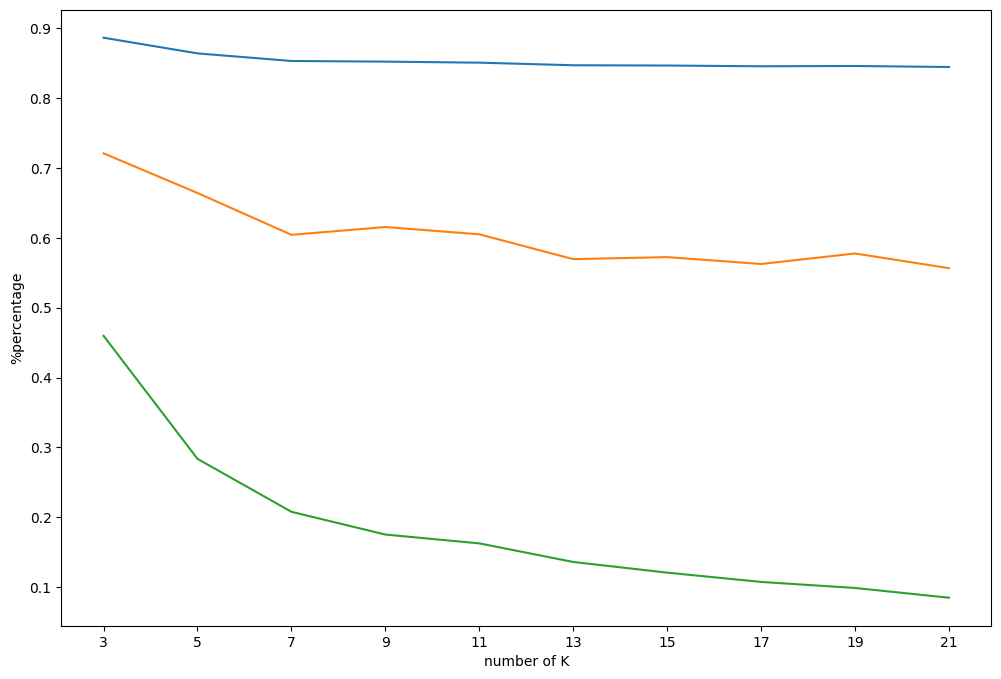

In [36]:
# Chart

plt.figure(figsize=(12, 8))
sns.lineplot(data=df2, x='k', y='accuracy', legend='full')
sns.lineplot(data=df2, x='k', y='precision')
sns.lineplot(data=df2, x='k', y='recall')

plt.ylabel("%percentage")
plt.xlabel("number of K")

ticks =  [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

plt.xticks(ticks=ticks)

plt.show()

Blue = Accuracy  
Orange = Precision  
Green = Recall  

We can see that accuracy is slightly higher when the number of K is smaller. On the other hand, precision and accuracy are much lower, and also show significant drops right from the start (from k=3 to k=5). Thus, the best value for K would be 3. 

Importantly, even with K = 3, we have an accuracy that can improve (72% of the attempts to predict the positive class were correct), and a very low recall, I would say unacceptable (about 45% of all existing values of the positive class were correct). Anyway, as it turns out, we are doing well in getting a high volume of the positive class right, because it is more representative, but we should be doing well for the negative class, which means that if the business objective is to save money by denying credit to "bad payers", this objective would be well fulfilled. Now, if it is the case that the goal is to expand the base to release credit, the algorithm would have to be well worked out.

### 3.2 What is the main problem with using the accuracy metric? Write a hypothetical example in which the problem occurs.

Let's say we have a business problem, where we use a classification algorithm, to know what discount we are going to apply for a customer. Despite being a value, there are discount classes (10, 20, 30%...). Let's assume that, in the training examples, we have the representativeness divided into 85%, 10% and 5%. When we run the algorithm and it brings a high result in accuracy, this result can be due to the fact that there are many hits in the predominant class, i.e., the data set used for training is unbalanced.

The problem with this is that we may be doing well in absolute numbers, but we may be hiding the performance result in other classes, which may be well below, and this is a problem because imagine that we would have the possibility to provide a 20% discount to a customer but we classify it as 10%. This customer could give up the purchase, be dissatisfied, he could use the 20% coupon to buy a product 3x more expensive, so in the end the company would have a higher margin.

So the problem of accuracy, basically occurs if we have unbalanced data, which would mask the performance results of other classes, which may be critical to the business.

### 3.3 Explain with a short text illustrating the difference between Precision and Recall metrics and showing when one should be chosen over the other.

Precision will measure the algorithm's accuracy in getting a given class right, given all the classification attempts it has made. For example, if the algorithm made 230 predictions of class A, and of these 170 were correct and 60 incorrect (false positive), we have an accuracy of 73%.

Recall, on the other hand, measures, within all examples that exist of the class, how many the algorithm got right. For example, this algorithm that got 200 examples of class A right, it got this result over 250 examples that exist of this class. With this, we have 80% recall.

When to use one or the other depends on the problem and the business strategy. Recall can be more interesting when it is critical to get the positive class right, for example, in a fraud case, where we transform the positive class into "fraudster". Failure to hit the available examples in the base can mean letting a fraudster through, so it is essential to hit as many of the available examples as possible.

Precision, on the other hand, can be used for similar situations, but when the goal is not the same. In the example above, we are more concerned about not losing money, so we don't want to miss a fraudster under any circumstances. But what if our goal was to scale the business, and we were actually looking to expand the customer base. Our positive class would be non-fraudulent, and for us it would be most important, of all the predictions we are making of this class, to get as much right as possible, so that we can have a new customer, interacting with our product, and not have their experience impacted with a false positive (in this case, fraudulent).

In short, one or the other will be chosen according to the goal and strategy, always weighing the tradeoff between false positives and false negatives.

### 3.4 Write a code snippet that automates the training of the KNN algorithm in order to find the best value for K from exercise 2.

In [37]:
def find_k(dataset, initial_k, last_k, predicted_variable, pos_label):
    
    # Assert if K values are odd
    try:
        assert initial_k % 2 != 0
        assert last_k % 2 != 0
    
    except(AssertionError):
        print("For a good operation of K-Nearest Neighbor, select odd values for K")
        
    # Define K interval
    k_values = list(range(initial_k, last_k+1, 2)) 
    
    # Create an empty dataframe that will receive the k and the metrics for each k value
    new_df = pd.DataFrame()

    # Separaring predictor and predicted variables
    features = dataset.select_dtypes(exclude="object").columns.to_list()
    labels = predicted_variable

    # Creating train datasets
    x_train = dataset.loc[:, features]
    y_train = dataset.loc[:, label].values.ravel()
    
    for i in k_values:
        knn_classifier = KNeighborsClassifier(n_neighbors=i)

        knn_classifier.fit(x_train, y_train)

        y_pred = knn_classifier.predict(x_train)

        # Metrics
        acc = metrics.accuracy_score(y_train, y_pred)
        prec = metrics.precision_score(y_train, y_pred, pos_label=pos_label, zero_division=0)
        rec = metrics.recall_score(y_train, y_pred, pos_label=pos_label)

        data = [i, acc, prec, rec]

        # Create dataframe from metrics
        aux = pd.DataFrame(data).T

        # Renames dataframe columns
        aux.rename(columns={0: 'k', 1: 'accuracy', 2: 'precision', 3: 'recall'}, inplace=True)

        # Create an object that receives both dataframes
        frames = [new_df, aux]

        # Concat and save to other variable
        new_df = pd.concat(frames)
        
        
    return new_df

In [38]:
df3 = find_k(df, 3, 21, "limite_adicional", "Conceder")

df3.index = list(range(0, len(df3)))
df3

,k,accuracy,precision,recall
0,3.0,0.886211,0.720833,0.459801
1,5.0,0.863789,0.664075,0.283721
2,7.0,0.852947,0.604247,0.207973
3,9.0,0.852000,0.615385,0.175415
4,11.0,0.850526,0.604938,0.162791
5,13.0,0.846842,0.569444,0.136213
6,15.0,0.846421,0.572327,0.120930
7,17.0,0.845368,0.562500,0.107641
8,19.0,0.845789,0.577519,0.099003
9,21.0,0.844316,0.556522,0.085050


### 3.4  Write a short text explaining the 6 denominations of the confusion matrix: P, N, TP, FN, FP and TN

P: Positive class. In a sense, it is the true class of the classification labels (yes, true, 1, can, grant, etc). Of course, it can be interchanged with the negative class, where this one, which denies something, will become the positive class.  
N: Negative class. Class contrary to the positive class.  
TP: True Positive. These are the cases where the prediction corresponds to the real label (Class A received label A)  
FP: False Positive. These are cases where the prediction classified with the label A, but was B  
FN: False Negative. These are cases that the prediction classified as label B, but was label A  
TN: True Positive. These are cases that the forecast classified as B and it really was B.  

### 3.5 In the data set used in Lesson 12: "K-Nearest Neighbors - Practice", are there any variables that hurt the assumptions of K-NN? If yes or no, please explain.

In [39]:
# Categorical
df.select_dtypes(include="object")
df

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional
0,1767,21,278.172008,2577.05,24196.89636,104.306544,31.038763,6,5,7,21,14,9,15,Não,Não,Negar
1,11920,40,268.874152,2465.39,19227.37796,69.858778,36.917093,5,8,5,40,23,10,18,Não,Não,Negar
2,8910,36,446.643127,1055.29,42822.28223,134.201478,34.561714,0,3,6,26,13,3,15,Sim,Não,Negar
3,4964,58,321.141267,703.05,51786.82600,297.350067,31.493561,0,3,7,12,7,2,1,Sim,Não,Negar
4,10100,35,428.716114,891.29,44626.85346,134.201478,28.028887,2,8,7,24,10,8,20,Sim,Não,Negar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,5155,29,157.500279,157.98,32624.67754,237.739275,32.407322,100,4,4,24,15,1,14,Sim,Não,Negar
9496,11977,1237,497.714090,805.43,49024.15700,118.883577,23.632195,0,4,7,10,11,2,3,Não,Não,Negar
9497,9278,47,306.557684,2250.42,42200.88978,134.201478,34.623576,4,4,4,13,8,4,24,Não,Não,Negar
9498,2525,42,209.870718,505.37,35391.32289,245.498881,28.758818,3,7,6,24,13,3,11,Sim,Não,Negar


In [40]:
# Numerical
df.select_dtypes(exclude="object")
df

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional
0,1767,21,278.172008,2577.05,24196.89636,104.306544,31.038763,6,5,7,21,14,9,15,Não,Não,Negar
1,11920,40,268.874152,2465.39,19227.37796,69.858778,36.917093,5,8,5,40,23,10,18,Não,Não,Negar
2,8910,36,446.643127,1055.29,42822.28223,134.201478,34.561714,0,3,6,26,13,3,15,Sim,Não,Negar
3,4964,58,321.141267,703.05,51786.82600,297.350067,31.493561,0,3,7,12,7,2,1,Sim,Não,Negar
4,10100,35,428.716114,891.29,44626.85346,134.201478,28.028887,2,8,7,24,10,8,20,Sim,Não,Negar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,5155,29,157.500279,157.98,32624.67754,237.739275,32.407322,100,4,4,24,15,1,14,Sim,Não,Negar
9496,11977,1237,497.714090,805.43,49024.15700,118.883577,23.632195,0,4,7,10,11,2,3,Não,Não,Negar
9497,9278,47,306.557684,2250.42,42200.88978,134.201478,34.623576,4,4,4,13,8,4,24,Não,Não,Negar
9498,2525,42,209.870718,505.37,35391.32289,245.498881,28.758818,3,7,6,24,13,3,11,Sim,Não,Negar


Yes. Starting with the first example, of categorical variables, apart from the label class of course, these variables hurt the principle of numerical distance relations. There is no distance between yes or no, True or False, between yellow, red and blue, etc.

But besides them, we also have the customer id, since, although it is numeric and it is even possible to calculate the distance (id 100 - id 1 = 99), this result makes no sense, since a distance of 99 ids means nothing, unless the id is assigned by the arrival of the customer. Even if this is the case, there is still no relation between id and whether the customer is a good or bad payer. Unlike the number of bank accounts, number of credit cards, etc. 